<img src="mac-logo-2021-01.svg" style="width:80px;height:80px;">

<h1 align="center">MAC x BUILD: Creating an End-to-End Machine Learning Project</h1> 

# Setting up environment

## Installing/upgrading pip

Check if pip is installed

```bash
python3 -m pip --version
```

Upgrade pip

```bash
python3 -m pip install --user -U pip
```

## Creating isolated environment

Install virtualenv

```bash
python3 -m pip install --user -U virutalenv
```

Make project directory

```bash
mkdir mac-ml
cd mac-ml
```

Make virtual environment

```bash
python3 -m venv env
```

Activate virtual environment

```bash
# linux/macOS
source env/bin/activate
# windows
.\env\Scripts\activate
```

Deactivate environment

```bash
deactivate
```

## Setup dependencies

Installing libraries 

```bash
python3 -m pip install -U jupyter matplotlib numpy pandas scipy scikit-learn
```

Starting jupyter notebook

```bash
jupyter notebook
```

In [1]:
import os
import tarfile
import urllib

Using `os.path.join()` lets you create a OS agnostic file path that you can use on any system. 

In [2]:
PWD = os.getcwd()
HOUSING_URL = "https://github.com/ageron/handson-ml/blob/master/datasets/housing/housing.tgz?raw=true"
HOUSING_PATH = os.path.join(PWD, "datasets", "housing")
HOUSING_PATH

'/media/sidratul/DATA/Coding/macml/datasets/housing'

Having a function that downloads the data is useful in particular if the data changes regularly.

In [3]:
def download_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    os.makedirs(housing_path, exist_ok = True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [5]:
download_housing_data()
housing = load_housing_data()

# Explore the data

The `.head()` method lets you look at a subset of rows from the top.

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- Each row represents one district.
- There are 10 attributes

# Features and labels

- Labels are what we're trying to predict. In our case, we want to predict the median house value.
- Features are what we use to make that prediction. Essentially everything but the label. You may remove some unnecessary features down the line if they are not really helping your prediction but for now we'll keep all the other columns as features. 

The `.info()` method gives you a quick description of the data, in particular the number of rows, the number of attributes, each attribute's data type and the number of non-null values for each attribute.

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

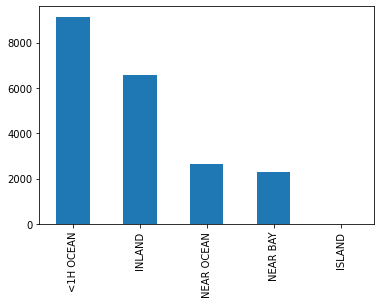

In [9]:
housing['ocean_proximity'].value_counts().plot(kind = "bar")

<AxesSubplot:>

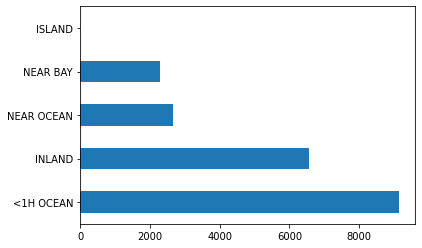

In [10]:
housing['ocean_proximity'].value_counts().plot(kind = "barh")

The `.desribe()` method shows a summary of the numerical attributes. 

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Another quick way to get a feel of the type of data you're working with is to plot a histogram for all the numerical attributes. The `hist()` method lets you do that in one go. 

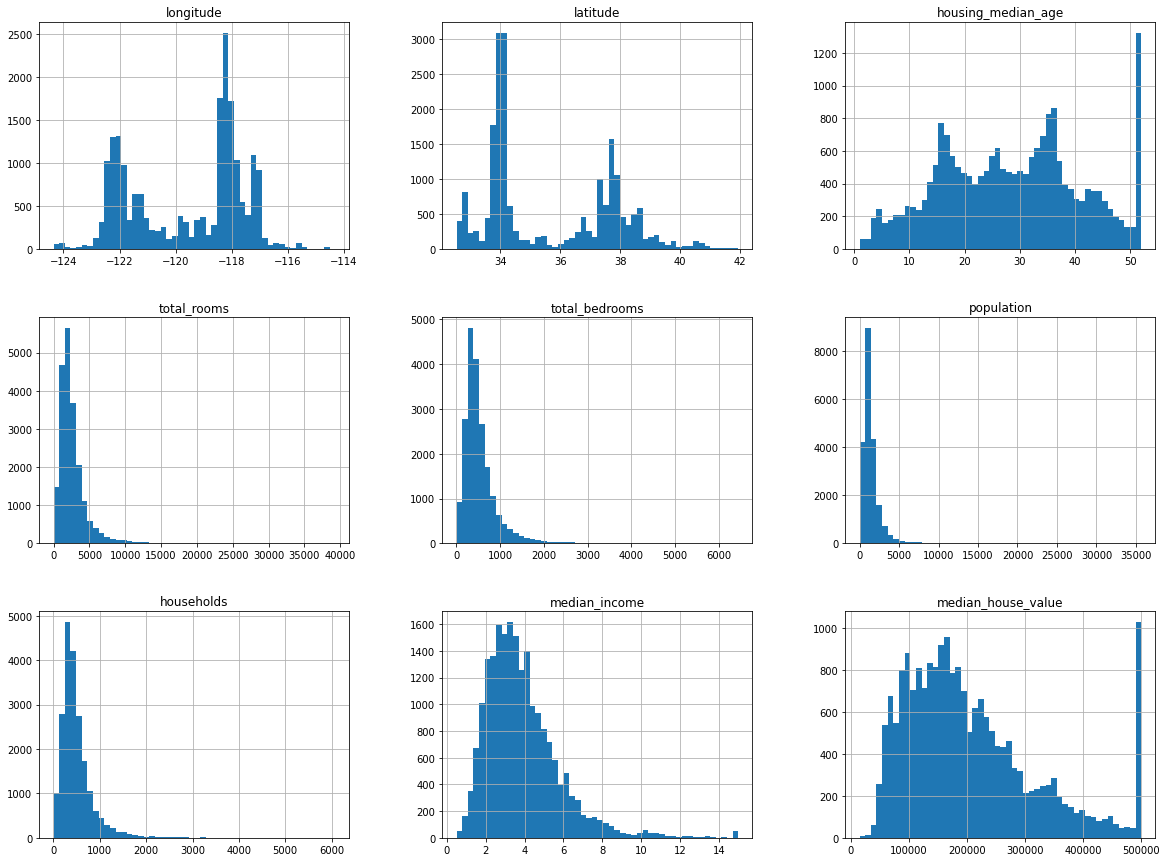

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [13]:
import numpy as np

In [14]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins = [0.0, 1.5, 3.0, 4.5, 6., np.inf],
                              labels = [1, 2, 3, 4, 5])
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

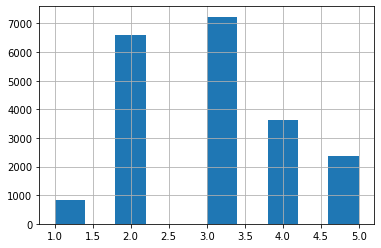

In [15]:
housing["income_cat"].hist()

# Creating training and test set

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

# Checking if our splits are representative of the original data

<AxesSubplot:>

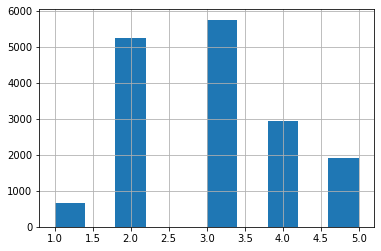

In [17]:
train_set['income_cat'].hist()

<AxesSubplot:>

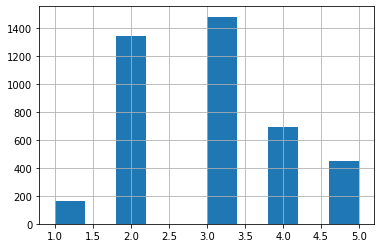

In [18]:
test_set["income_cat"].hist()

# Stratified split
The population is divided into homogenous subgroups called strata. Then right number of instances are sampled from each subgroup to make sure test set is representative of the overall population.

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [21]:
strat_train_set["income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1890
1     657
Name: income_cat, dtype: int64

In [22]:
strat_test_set["income_cat"].value_counts()

3    1447
2    1316
4     728
5     472
1     165
Name: income_cat, dtype: int64

It's hard to judge whether each category has been equally represented based on the raw numbers because the datasets are different sizes. What we can do is check what is percentage of each category.

In [23]:
strat_train_set["income_cat"].value_counts()*100/len(strat_train_set)

3    35.059351
2    31.885901
4    17.629603
5    11.446221
1     3.978924
Name: income_cat, dtype: float64

In [24]:
strat_test_set["income_cat"].value_counts()*100/len(strat_test_set)

3    35.053295
2    31.879845
4    17.635659
5    11.434109
1     3.997093
Name: income_cat, dtype: float64

Let's drop the `income_cat` column now that we don't have any use for it. 

In [25]:
strat_train_set.drop("income_cat", axis = 1, inplace=True) # axis = 1 means columns
strat_test_set.drop("income_cat", axis = 1, inplace=True)

# Visualizing the data to gain insights

In [26]:
housing_viz = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

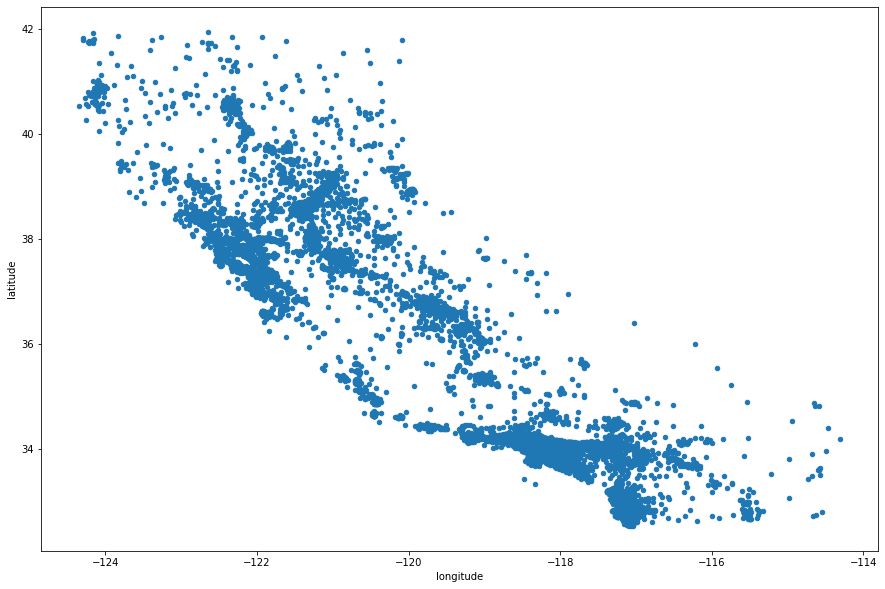

In [27]:
housing_viz.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(15, 10))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

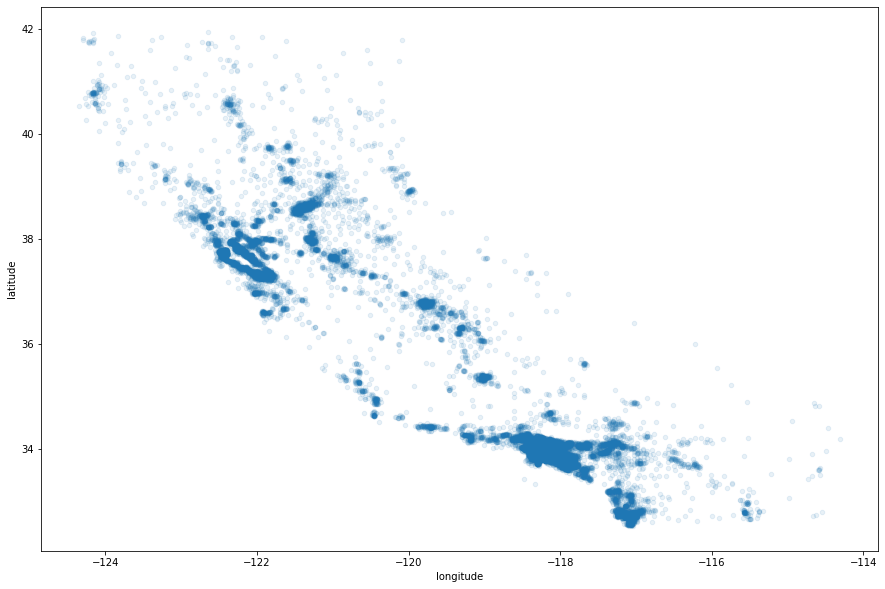

In [28]:
housing_viz.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(15, 10), alpha = 0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

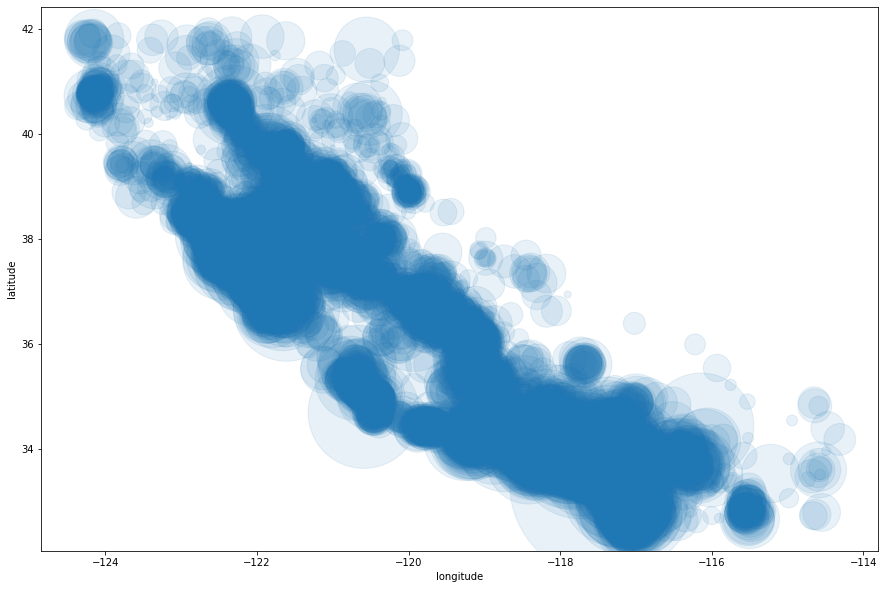

In [29]:
housing_viz.plot(kind = "scatter", 
                 x = "longitude", 
                 y = "latitude",
                 s = housing_viz["population"],
                 figsize=(15, 10), 
                 alpha = 0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

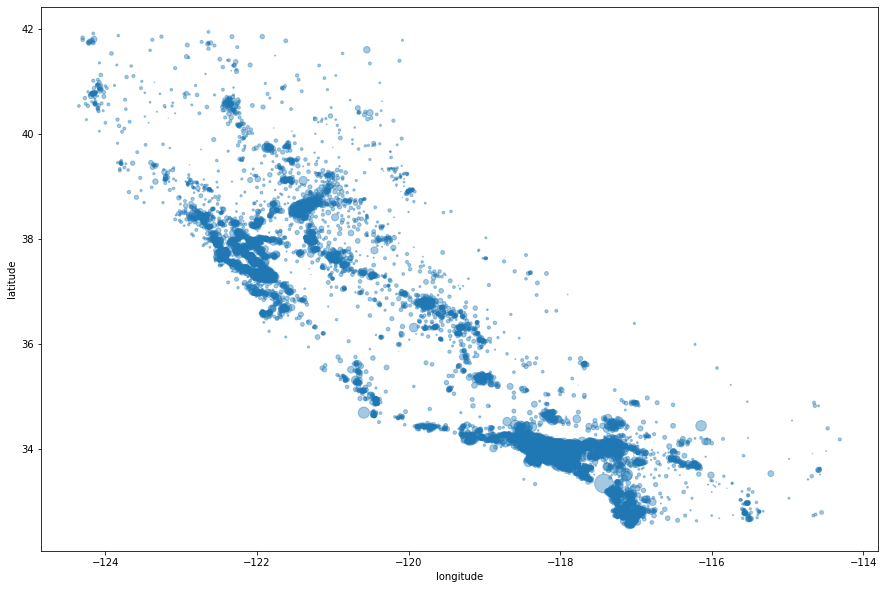

In [30]:
housing_viz.plot(kind = "scatter", 
                 x = "longitude", 
                 y = "latitude",
                 s = housing_viz["population"]/100,
                 figsize=(15, 10), 
                 alpha = 0.4)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

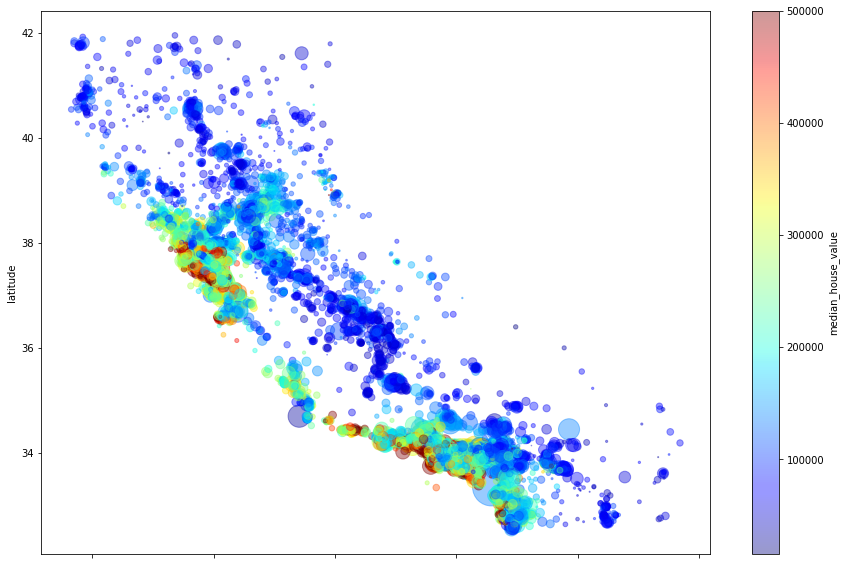

In [31]:
housing_viz.plot(kind = "scatter", 
                 x = "longitude", 
                 y = "latitude",
                 s = housing_viz["population"]/25,
                 c = "median_house_value",
                 cmap = plt.get_cmap("jet"),
                 figsize=(15, 10), 
                 alpha = 0.4)

## Correlation
Correlation is the indicator of the strength of the linear relationship between two different variables. It ranges between -1 to 1. +1 means strong positive correlation and -1 means strong negative correlation. Close to 0 means no linear relationship. 

In [32]:
corr_matrix = housing_viz.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [33]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>]],
      dtype=object)

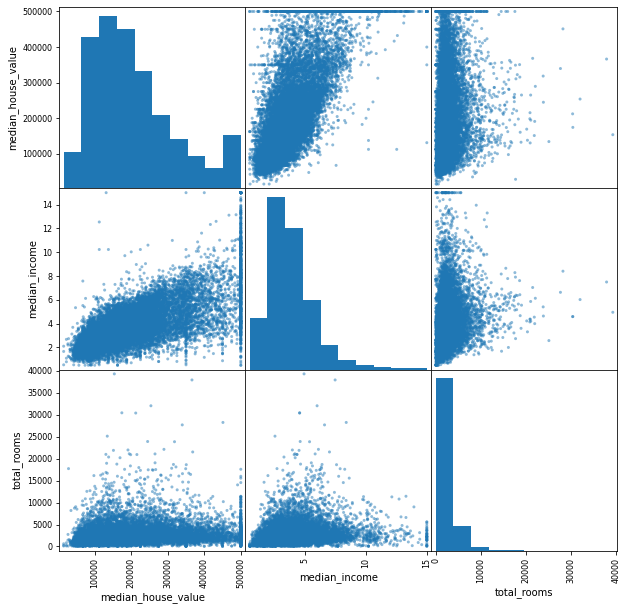

In [34]:
from pandas.plotting import scatter_matrix

features = ["median_house_value", "median_income", "total_rooms"]

scatter_matrix(housing_viz[features], figsize = (10, 10))

## Correlation cofficient only measures linear relationship

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)

# Preparing Data for Machine Learning

In [47]:
housing_prep = strat_train_set.drop("median_house_value", axis = 1)
housing_prep_labels = strat_train_set["median_house_value"].copy()

# Data Cleaning

In [49]:
rows_with_na = housing_prep[housing_prep.isnull().any(axis = 1)].head()
rows_with_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [50]:
rows_with_na.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [51]:
rows_with_na.drop(["total_bedrooms"], axis = 1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


In [54]:
median = housing_prep["total_bedrooms"].median()
rows_with_na["total_bedrooms"].fillna(median, inplace = True)
rows_with_na

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [55]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [57]:
housing_num = housing_prep.select_dtypes(include = [np.number])
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [58]:
imputer.fit(housing_num) # fit the imputer to our data, basically getting the medians for all the columns
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [60]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [63]:
housing_num = pd.DataFrame(X,
                          columns = housing_num.columns,
                          index = housing_num.index)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Encoding categorical variables

In [76]:
housing_cat = housing_prep[["ocean_proximity"]]
housing_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [77]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [79]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

Since `ocean_proximity` does not have an inherent ordering i.e. it's a nominal variable, it may be better to use one hot encoding. 

In [80]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse = False)

In [81]:
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [82]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Feature Engineering

In [36]:
housing_prep["rooms_per_household"] = housing_prep["total_rooms"] / housing_prep["households"]

Similarly, total number of bedrooms is not in itself very useful. We probably want to compare it to the number of bedrooms.

In [37]:
housing_prep["bedrooms_per_room"] = housing_prep["total_bedrooms"] / housing_prep["total_rooms"]

Another interesting attribute combination to look at might be the population per household.

In [38]:
housing_prep["population_per_household"] = housing_prep["population"] / housing_prep["households"]

In [39]:
housing_merged = pd.concat([housing_prep, housing_prep_labels], axis=1)
corr_matrix = housing_merged.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

## Scaling our Data

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_num)
housing_scaled

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.73260236,
         0.55628602, -0.8936472 ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.53361152,
         0.72131799,  1.292168  ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.67467519,
        -0.52440722, -0.52543365],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.86201341,
        -0.86511838, -0.36547546],
       [-1.56080303,  1.2492109 , -1.1653327 , ..., -0.18974707,
         0.01061579,  0.16826095],
       [-1.28105026,  2.02567448, -0.13148926, ..., -0.71232211,
        -0.79857323, -0.390569  ]])

# Building our data pipeline

Seperate features & labels -> Feature Engineer -> Impute missing values -> Encode categorical variables -> Scale numerical variables

In [91]:
def data_pipeline(data):
    
    # Seperate labels and features #
    labels = data["median_house_value"]
    data = data.drop("median_house_value", axis = 1)
    
    # Feature Engineering #
    features_engineered = data.copy()
    features_engineered["rooms_per_household"] = features_engineered["total_rooms"] / features_engineered["households"]
    features_engineered["bedrooms_per_room"] = features_engineered["total_bedrooms"] / features_engineered["total_rooms"]
    features_engineered["population_per_household"] = features_engineered["population"] / features_engineered["households"]
    features = list(features_engineered.columns) # Creating a list of our features for future use
    
    # Impute missing values
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")
    features_num = features_engineered.select_dtypes(include=[np.number])
    features_num_imputed = imputer.fit_transform(features_num)
    
    # Encoding categorical variables
    features_cat = features_engineered.select_dtypes(exclude=[np.number])
    
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    features_cat_1hot = cat_encoder.fit_transform(features_cat)
    
    features = features + cat_encoder.categories_[0].tolist() # add the new 1 hot encoded features to our list
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore
    
    # Scaling Numerical Data #
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    features_num_imputed_scaled = scaler.fit_transform(features_num_imputed)
    
    # Join all our data together
    
    output = np.hstack([features_num_imputed_scaled, features_cat_1hot])
    
    return output, labels, features

# Select and Train a Model

## Transform our data using the pipeline we created 

In [93]:
train_data, train_labels, features = data_pipeline(strat_train_set)

In [94]:
train_data

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [95]:
train_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [96]:
features

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_household',
 'bedrooms_per_room',
 'population_per_household',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [97]:
test_data, test_labels, features = data_pipeline(strat_test_set)

## Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [100]:
some_data = train_data[:5]
some_labels = train_labels[:5]

In [104]:
some_preds = lin_reg.predict(some_data)
some_preds

array([ 83648.54287152, 305815.0882093 , 150013.37994426, 188096.42566946,
       241840.13952577])

In [102]:
some_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [105]:
some_preds - some_labels

12655    11548.542872
15502    26215.088209
2908     67313.379944
14053    75596.425669
20496     3540.139526
Name: median_house_value, dtype: float64

### RMSE on training set

In [110]:
from sklearn.metrics import mean_squared_error

lin_train_preds = lin_reg.predict(train_data)

lin_mse = mean_squared_error(train_labels, lin_train_preds)
lin_mse

4645911608.916934

In [111]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68160.92435491859

## Decision Tree Regressor

In [109]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [112]:
tree_train_preds = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, tree_train_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross validation

![title](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [120]:
from sklearn.model_selection import cross_val_score
tree_cv_mse= cross_val_score(tree_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)

In [121]:
tree_cv_rmse = np.sqrt(-tree_cv_mse)
tree_cv_rmse

array([71918.58642103, 71384.84501617, 68633.80280963, 69659.52488314,
       67941.65145966, 75921.07007104, 71837.53328882, 72468.1641427 ,
       68601.96049537, 68323.32006781])

In [122]:
tree_cv_rmse.mean()

70669.045865536

In [123]:
tree_cv_rmse.std()

2379.810209113841

In [133]:
lin_cv_mse = cross_val_score(lin_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_cv_rmse = np.sqrt(-lin_cv_mse)

In [134]:
lin_cv_rmse.mean()

68439.72141026422

In [135]:
lin_cv_rmse.std()

2408.8928462974695

## Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [138]:
forest_cv_mse = cross_val_score(forest_reg, train_data, train_labels, scoring = "neg_mean_squared_error", cv = 10)

In [139]:
forest_cv_rmse = np.sqrt(-forest_cv_mse)

In [140]:
forest_cv_rmse.mean()

50339.50540453655

In [141]:
forest_cv_rmse.std()

2206.1714766286996

# Fine tuning our model

## Grid search

In [142]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [143]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [155]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65119.22597571509 {'max_features': 2, 'n_estimators': 3}
55223.5947809774 {'max_features': 2, 'n_estimators': 10}
52786.159328222646 {'max_features': 2, 'n_estimators': 30}
60681.200130349374 {'max_features': 4, 'n_estimators': 3}
52490.03868445132 {'max_features': 4, 'n_estimators': 10}
50472.09736091612 {'max_features': 4, 'n_estimators': 30}
58333.75312490932 {'max_features': 6, 'n_estimators': 3}
51766.98839356613 {'max_features': 6, 'n_estimators': 10}
49882.96011935094 {'max_features': 6, 'n_estimators': 30}
59288.94215890149 {'max_features': 8, 'n_estimators': 3}
52040.865576692486 {'max_features': 8, 'n_estimators': 10}
49985.97352309603 {'max_features': 8, 'n_estimators': 30}
63210.50747680449 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54510.12433444709 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58152.56594870564 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51810.53293480496 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

## Randomized Search

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1be9686040>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f1be967a490>},
                   random_state=42, scoring='neg_mean_squared_error')

In [146]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=180, random_state=42)

## Feature importance

In [150]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.69973806e-02, 7.00351211e-02, 4.19508377e-02, 1.72928616e-02,
       1.72956635e-02, 1.78824437e-02, 1.64855146e-02, 3.26982327e-01,
       4.97468264e-02, 8.47983613e-02, 1.04610459e-01, 1.60147674e-02,
       1.51555966e-01, 7.55747095e-05, 3.25555065e-03, 5.02034486e-03])

In [152]:
feature_importances_list = list(zip(features, feature_importances))
feature_importances_list

[('longitude', 0.07699738055141943),
 ('latitude', 0.07003512112918531),
 ('housing_median_age', 0.041950837711577045),
 ('total_rooms', 0.017292861637860507),
 ('total_bedrooms', 0.017295663459248437),
 ('population', 0.01788244367196627),
 ('households', 0.01648551458288839),
 ('median_income', 0.326982327162615),
 ('rooms_per_household', 0.049746826352699065),
 ('bedrooms_per_room', 0.08479836130519176),
 ('population_per_household', 0.10461045889757281),
 ('<1H OCEAN', 0.01601476737636536),
 ('INLAND', 0.1515559659408615),
 ('ISLAND', 7.55747095254322e-05),
 ('NEAR BAY', 0.00325555065072949),
 ('NEAR OCEAN', 0.005020344860294099)]

<BarContainer object of 16 artists>

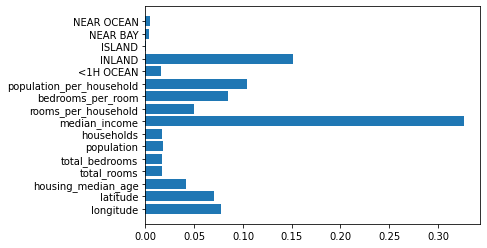

In [153]:
plt.barh(y=features, width=feature_importances.tolist(), )

# Final Model

In [156]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(test_data)

In [157]:
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

64105.377424193844

# Saving your model for production

In [158]:
import pickle

In [165]:
MODEL_PATH = os.path.join(PWD, "final_model.pkl",)
with open(MODEL_PATH, 'wb') as handle:
    pickle.dump(final_model, handle, pickle.HIGHEST_PROTOCOL)

# Loading model

In [166]:
with open(MODEL_PATH, 'rb') as handle:
    loaded_model = pickle.load(handle)  

In [167]:
loaded_model

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

# Next steps

- Deploy your model
- Collect fresh data regularly. 
- Write a script to retrain and fine-tune your model in regular intervals
- Write a script that will evaluate both the old model and the new model based on the updated test set, and deploy the new model if performance has not decreased
- If performance has decreased we have to go back to discovery and figure out why.